# Your mission

You started working in a financial institution. You manager Mark is insterested in investing and trading **Bitcoin** to diversify his portfolio. So he turned to you to develop a crypto trading bot.

A **crypto trading bot** is a computer program with an underlying predictive model that automatically outputs a predicted day to day price for the next 30 days based on the history of Bitcoin market price and Blockchain variables. 

Your mission is to train an accurate predictive model with the lowest mean squared error. Mark is a very technical guy, he likes to understand all **technical details** and would like you to **compare the performances of classical models and neural-net based models**.

Your **target variable** is the Bitcoin Market price.

**Data source** : https://blockchain.info/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/EI time series_GRP3")


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import helper_functions as hf

CURDIR = os.getcwd()
DATADIR = os.path.join(CURDIR,  "data")
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Exploration

In this section, you are to explore the data. You are to fulfill the following tasks:
- **Univariate analysis**
    - study the Bitcoin market price time series, in terms of its trend, cycle, seasonality, and stationnarity 
    - **Tips**: you can analyse ACF, PACF plots, perform Augmented Dickey-Fuller test
- **Multivariate analysis**
    - study other blockchain variables, retrieve insights
    - study the correlation between the Bitcoin market price and other blockchain variables 
    - **Tips**: Pearson correlation

In [ ]:
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"), 
                            delimiter=",")


In [ ]:
df_blockchain.head()

,Date,market-price,n-transactions-per-block,median-confirmation-time,hash-rate,difficulty,miners-revenue,trade-volume,blocks-size,avg-block-size,...,cost-per-transaction,n-unique-addresses,n-transactions,n-transactions-total,n-transactions-excluding-popular,output-volume,estimated-transaction-volume,estimated-transaction-volume-usd,total-bitcoins,market-cap
0,2011-09-13,6.88,45.908451,0.0,12.018816,1.777774e+06,52318.011503,0.0,592.190091,0.019009,...,7.666766,12622.0,6519.0,1497195.0,6519.0,358543.612114,58615.641320,403275.612279,7.257416e+06,5.022014e+07
1,2011-09-14,6.19,42.465753,0.0,13.263925,1.755425e+06,48306.468911,0.0,594.907367,0.018007,...,7.369408,12408.0,6200.0,1503780.0,6200.0,302619.024544,74521.484625,461287.989830,7.264662e+06,4.540930e+07
2,2011-09-15,5.92,41.500000,0.0,12.914875,1.755425e+06,60431.444952,0.0,597.554226,0.018240,...,7.333913,12988.0,6474.0,1509972.0,6474.0,299226.130646,79422.402932,470180.625359,7.272284e+06,4.322228e+07
3,2011-09-16,5.58,52.176471,0.0,10.995096,1.755425e+06,34345.021913,0.0,600.362512,0.022136,...,5.466341,12059.0,6209.0,1516381.0,6209.0,674606.861338,82696.853247,461448.441118,7.279040e+06,4.088136e+07
4,2011-09-17,5.18,40.701493,0.0,10.733308,1.755425e+06,36805.913687,0.0,602.995510,0.017116,...,6.489054,10988.0,5454.0,1522600.0,5454.0,354198.945778,68238.166521,353473.702578,7.285375e+06,3.801833e+07


In [ ]:
df_blockchain.columns.sort_values().shape

(23,)

Plotting bitcoin price evolution using candlesticks:

In [ ]:
cols = list(df_blockchain.columns)
cols
cols_to_rem =['n-transactions-per-block',
 'median-confirmation-time',
 'hash-rate',
 'difficulty',
 'miners-revenue',
 'trade-volume',
 'blocks-size',
 'avg-block-size',
 'transaction-fees',
 'transaction-fees-usd',
 'cost-per-transaction-percent',
 'cost-per-transaction',
 'n-unique-addresses',
 'n-transactions',
 'n-transactions-total',
 'n-transactions-excluding-popular',
 'output-volume',
 'estimated-transaction-volume',
 'estimated-transaction-volume-usd',
 'total-bitcoins',
 'market-cap']
df=df_blockchain.values.T
df=df[1,:3543]
df=np.append(df,df[-1])
dfcheyha=df_blockchain.drop(index=3543)
new_dF =dfcheyha.drop(cols_to_rem,axis=1)
new_dF['close']=df[1:]
high=np.maximum(df[1:],df[:len(df)-1])
low=np.minimum(df[1:],df[:len(df)-1])
new_dF['high']=high
new_dF['low']=low
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=new_dF['Date'],
                open=new_dF['market-price'],
                high=new_dF['high'],
                low=new_dF['low'],
                close=new_dF['close'])])

fig.show()

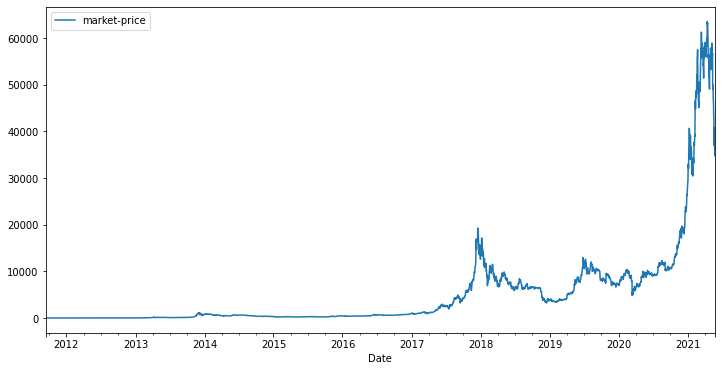

In [ ]:
df_blockchain['Date'] = pd.to_datetime(df_blockchain['Date']) # convert date column to DateTime
ax = df_blockchain.plot(x='Date', y='market-price', figsize=(12,6))
plt.plot( df_blockchain['market-price'])

# we can see that for the following dates, there are sudden jumps in the times series
#it may seem to us that the prices peak once in a year and a half 
#xcoords = ['2018-01-01', '2019-07-01', '2021-01-01']
#for xc in xcoords:
   # plt.axvline(x=xc, color='black', linestyle='--')



there is some kind of an exponential trend around 2018 a
nd 2021 which is why we'll by plotting the log prices


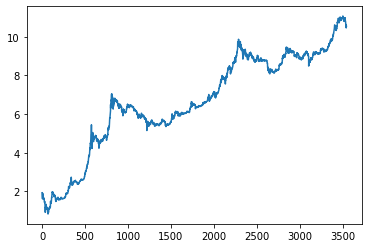

In [ ]:
logdata=np.log(df_blockchain["market-price"])
plt.plot(logdata)

we see an up trend in the log plot

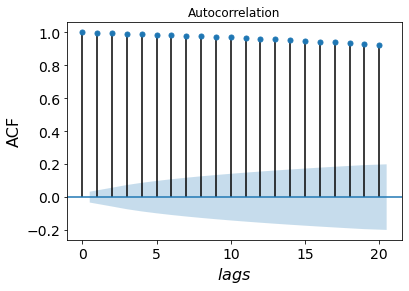

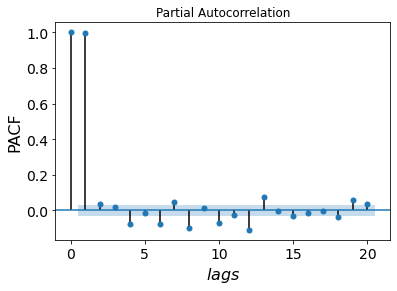

In [ ]:
plot_acf(df_blockchain['market-price'], lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

plot_pacf(df_blockchain['market-price'], lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
# the data is not stationary :
from statsmodels.tsa.stattools import adfuller
adfuller(df_blockchain["market-price"])

(-0.5152297946329041,
 0.8890100827558736,
 30,
 3513,
 {'1%': -3.4322128194388357,
  '10%': -2.567208143922995,
  '5%': -2.8623630880962465},
 53476.59821314083)

In [ ]:
# differentiate to remove the trend : 
diff=[]
list=df_blockchain["market-price"].values
for i in range(1,len(list)):
    diff.append(list[i]-list[i-1])

In [ ]:
adfuller(diff)

(-7.540724669398033,
 3.383775602771236e-11,
 30,
 3512,
 {'1%': -3.432213350242838,
  '10%': -2.567208268744065,
  '5%': -2.8623633225589806},
 53440.24567688576)

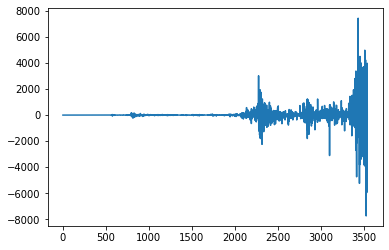

In [ ]:
plt.plot(diff)
#it looks stationary after detrending

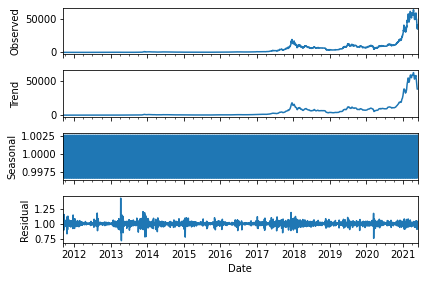

In [ ]:

#seasonality of the series :

#We’ll select a multiplicative model since it would appear the amplitude of the cycles is increasing with time


from statsmodels.tsa.seasonal import seasonal_decompose

df_blockchain.set_index('Date', inplace=True)

analysis = df_blockchain[['market-price']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

#The results are obtained by first estimating the trend by applying a convolution filter to the data. 
#The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.



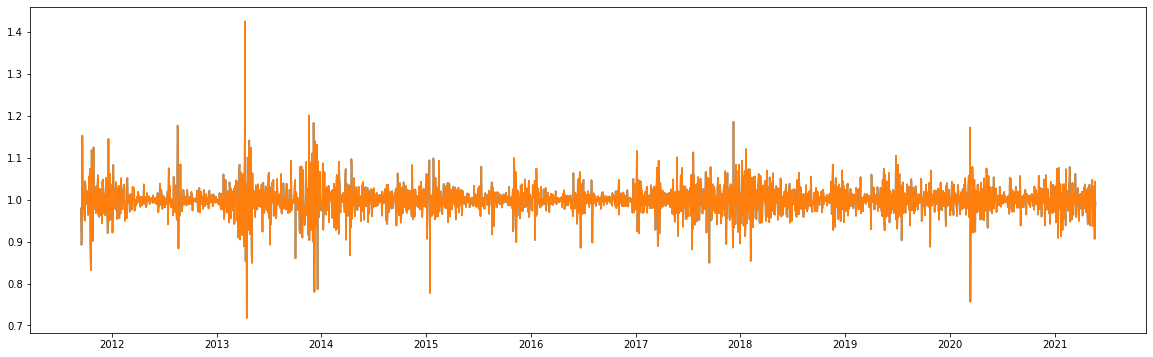

In [ ]:
detrend=decompose_result_mult.observed/trend
plt.figure(figsize=(20, 6))
plt.plot(detrend/seasonal)
plt.plot(residual)

In [ ]:
# for t_out in [0,1000,1500,2000,2500] : the frequency of the season is very high therefore we cannot properly observe it
tout=3300
df=df_blockchain[tout:]
analysis1 = df[['market-price']].copy()


decompose_result_mult1 = seasonal_decompose(analysis1, model="multiplicative")

trend1 = decompose_result_mult1.trend
seasonal1 = decompose_result_mult1.seasonal
residual1 = decompose_result_mult1.resid

#decompose_result_mult.plot();

plt.figure(figsize=(20, 6))
#plt.plot(seasonal1)
#plt.show()





<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

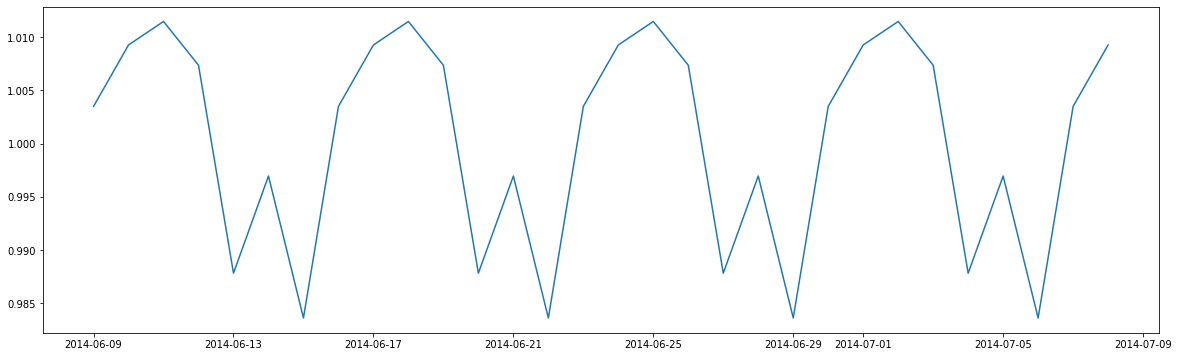

In [ ]:
tin, tout= 1000, 1030

df=df_blockchain[tin:tout]
analysis2 = df[['market-price']].copy()


decompose_result_mult2 = seasonal_decompose(analysis2, model="multiplicative")

trend2 = decompose_result_mult2.trend
seasonal2 = decompose_result_mult2.seasonal
residual2 = decompose_result_mult2.resid

#decompose_result_mult.plot();

plt.figure(figsize=(20, 6))
plt.plot(seasonal2)
plt.show()

the residuals are the time series after the trend, and seasonal components are removed

In [ ]:
data=residual
print (residual)

            market-price
Date                    
2011-09-13           NaN
2011-09-14           NaN
2011-09-15           NaN
2011-09-16      0.979043
2011-09-17      0.931254
...                  ...
2021-05-22      0.969875
2021-05-23      0.993497
2021-05-24           NaN
2021-05-25           NaN
2021-05-26           NaN

[3544 rows x 1 columns]


In [ ]:
from numpy import NaN
residual=residual.dropna()
print(residual)

            market-price
Date                    
2011-09-16      0.979043
2011-09-17      0.931254
2011-09-18      0.891991
2011-09-19      0.910258
2011-09-20      1.033111
...                  ...
2021-05-19      1.016622
2021-05-20      0.906190
2021-05-21      1.042982
2021-05-22      0.969875
2021-05-23      0.993497

[3538 rows x 1 columns]


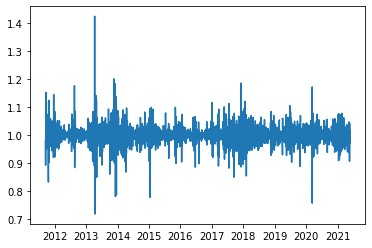

In [ ]:
plt.plot(residual)

In [ ]:
# order of integration of the residual
from statsmodels.tsa.stattools import adfuller
print(adfuller(residual['market-price']))
#it seems that the series is stationnary, therefore we can fit an arma model

(-16.6723280415276, 1.5411398451058713e-29, 29, 3508, {'1%': -3.4322154764873143, '5%': -2.8623642617472096, '10%': -2.5672087687403544}, -15032.047791857687)


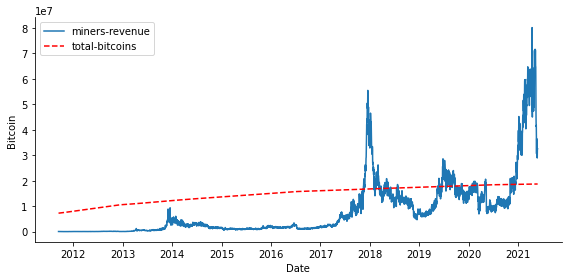

In [ ]:
# Multivariable analysis

# Let's begin with two variables : miners revenue and total-bitcoins

fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="Date", y="miners-revenue", data=df_blockchain, 
             ax=ax, label="miners-revenue", markers=True )
plot_ = sns.lineplot(x="Date",
             y="total-bitcoins",
             data=df_blockchain,
             color="red",ax=ax, label="total-bitcoins")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()

ax.set_ylabel("Bitcoin")
ax.set_xlabel("Date")
sns.despine()
plt.legend()
plt.tight_layout()


In [ ]:
# We can see that, as expected, the total-bitcoins variable looks not correlated with the market price, whereas the miners-revenue looks correlated


In [ ]:
# Let's proove that by using the Pearson correlation coefficient 

df_blockchain_1=df_blockchain[['market-price', 'miners-revenue', 'total-bitcoins']]

df_blockchain_1.corr(method='pearson')

,market-price,miners-revenue,total-bitcoins
market-price,1.000000,0.934751,0.517235
miners-revenue,0.934751,1.000000,0.593896
total-bitcoins,0.517235,0.593896,1.000000


In [ ]:
df_blockchain.corr(method='pearson')

# We better see the result by using ProfileReport in the widget 'Correlations' -> "pearson's r" as done in the RNN notebook

,market-price,n-transactions-per-block,median-confirmation-time,hash-rate,difficulty,miners-revenue,trade-volume,blocks-size,avg-block-size,transaction-fees,...,cost-per-transaction,n-unique-addresses,n-transactions,n-transactions-total,n-transactions-excluding-popular,output-volume,estimated-transaction-volume,estimated-transaction-volume-usd,total-bitcoins,market-cap
market-price,1.000000,0.479034,0.163434,0.785757,0.787926,0.934751,0.542669,0.721522,0.585375,0.224723,...,0.885611,0.623646,0.472213,0.718141,0.476153,-0.003241,-0.125954,0.904408,0.517235,0.999317
n-transactions-per-block,0.479034,1.000000,0.298547,0.644355,0.653734,0.556440,0.390951,0.859796,0.967488,0.422698,...,0.397601,0.940259,0.979623,0.859292,0.979279,0.084143,-0.113321,0.511910,0.914862,0.470608
median-confirmation-time,0.163434,0.298547,1.000000,0.133825,0.168190,0.118787,0.191306,0.204435,0.297303,0.372361,...,0.050862,0.285115,0.237775,0.205115,0.241626,0.176041,0.008405,0.221241,0.172043,0.161839
hash-rate,0.785757,0.644355,0.133825,1.000000,0.991008,0.747311,0.346583,0.919260,0.714108,0.052356,...,0.652325,0.695735,0.637739,0.920191,0.643763,-0.051008,-0.170567,0.709961,0.670521,0.786735
difficulty,0.787926,0.653734,0.168190,0.991008,1.000000,0.732753,0.351363,0.920921,0.720422,0.056642,...,0.645171,0.690350,0.627342,0.921779,0.633505,-0.049069,-0.169074,0.714501,0.669993,0.789044
miners-revenue,0.934751,0.556440,0.118787,0.747311,0.732753,1.000000,0.666318,0.748194,0.640148,0.371816,...,0.939052,0.708354,0.578157,0.746158,0.575320,-0.013709,-0.143223,0.882509,0.593896,0.927072
trade-volume,0.542669,0.390951,0.191306,0.346583,0.351363,0.666318,1.000000,0.458366,0.449828,0.456501,...,0.649419,0.521670,0.396697,0.456495,0.389134,0.007244,-0.076971,0.624197,0.409946,0.527181
blocks-size,0.721522,0.859796,0.204435,0.919260,0.920921,0.748194,0.458366,1.000000,0.903627,0.228396,...,0.644560,0.875453,0.846676,0.999895,0.847385,-0.019108,-0.182677,0.679405,0.869671,0.715828
avg-block-size,0.585375,0.967488,0.297303,0.714108,0.720422,0.640148,0.449828,0.903627,1.000000,0.399345,...,0.510765,0.958615,0.951277,0.902514,0.952688,0.071746,-0.127521,0.592477,0.937831,0.577382
transaction-fees,0.224723,0.422698,0.372361,0.052356,0.056642,0.371816,0.456501,0.228396,0.399345,1.000000,...,0.265638,0.509038,0.442459,0.231001,0.438902,0.143422,0.031592,0.362128,0.303457,0.211579


## Train test split

In [ ]:
X_train, X_test = hf.data_split(df_blockchain)
#for training data then testing it

In [ ]:
#X_train

In [ ]:
r_train, r_test= hf.data_split(residual)

In [ ]:
r_train

,market-price
Date,
2011-09-16,0.979043
2011-09-17,0.931254
2011-09-18,0.891991
2011-09-19,0.910258
2011-09-20,1.033111
...,...
2021-04-19,0.970559
2021-04-20,0.985075
2021-04-21,1.024133


#First method : Modeling the time series with ARIMA 
 we will try modeling the times series directly, without de-trending it

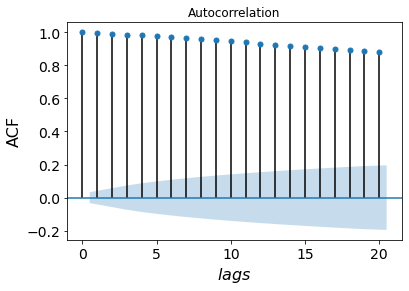

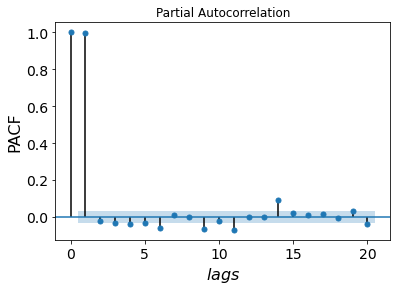

In [ ]:
plot_acf(X_train['market-price'], lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()
plot_pacf(X_train['market-price'], lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
adfuller(X_train['market-price'])[0]

NameError: ignored

In [ ]:
best_cfg, best_score = hf.arima_grid_search(X_train["market-price"], 
                                            X_test["market-price"],
                                            np.arange(3), np.arange(3) , np.arange(3))

ARIMA(0,0,0) RMSE=45461.693
ARIMA(0,0,1) RMSE=23417.022
ARIMA(0,1,0) RMSE=2931.168
ARIMA(0,1,1) RMSE=2900.580
ARIMA(0,1,2) RMSE=2850.420
ARIMA(0,2,0) RMSE=4785.771


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0,2,1) RMSE=2971.087


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


ARIMA(1,0,0) RMSE=2928.979
ARIMA(1,1,0) RMSE=2893.998
ARIMA(1,1,1) RMSE=2885.064
ARIMA(1,1,2) RMSE=2853.035
ARIMA(1,2,0) RMSE=3400.843
ARIMA(1,2,1) RMSE=2929.923


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(1,2,2) RMSE=2922.656


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2,0,0) RMSE=2891.950
ARIMA(2,1,0) RMSE=2860.912
ARIMA(2,1,1) RMSE=2855.361
ARIMA(2,1,2) RMSE=2994.976
ARIMA(2,2,0) RMSE=3240.465
ARIMA(2,2,1) RMSE=2889.522


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatoo

ARIMA(2,2,2) RMSE=2927.057
Best ARIMA(0, 1, 2) MSE=2850.420


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


the best ARIMA is given by ARIMA(0, 1, 2) with an MSE=2850.420

In [ ]:
parameters0 = (0,1,2)
errors0, predictions0 = hf.evaluate_arima_model(X_train["market-price"], 
                                              X_test["market-price"], parameters0 )
predict_date = df_blockchain.index[-30::] #30 dernières lignes?
# to see the difference use X_test
df_predict = pd.DataFrame(zip(predict_date,
                              predictions0, X_test["market-price"].values),
                          columns=["date", "predict", "true"])




In [ ]:
predict_date.day

Int64Index([27, 28, 29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64', name='Date')

In [ ]:
axis=[]
for i in range (len(predict_date.day)) :
  axis.append(f"{predict_date.day[i]}-0{predict_date.month[i]}") 
print(axis)

['27-04', '28-04', '29-04', '30-04', '1-05', '2-05', '3-05', '4-05', '5-05', '6-05', '7-05', '8-05', '9-05', '10-05', '11-05', '12-05', '13-05', '14-05', '15-05', '16-05', '17-05', '18-05', '19-05', '20-05', '21-05', '22-05', '23-05', '24-05', '25-05', '26-05']


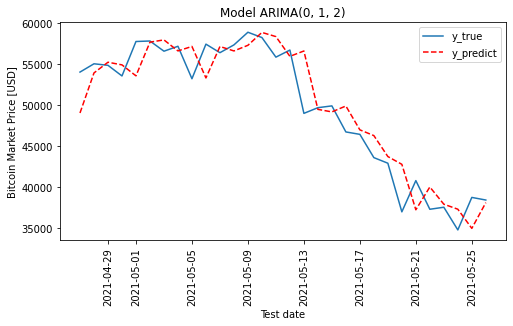

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="date", y="true", data=df_predict, 
             ax=ax, label="y_true", markers=True )
plot_ = sns.lineplot(x="date",
             y="predict",
             data=df_predict,
             color="red",ax=ax, label="y_predict")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()
freq = 4
labels = axis
plt.xticks(rotation = 'vertical')
ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title(f"Model ARIMA{parameters0}")
#sns.despine()
plt.legend()
#plt.tight_layout()

## other method : Modeling the components( trend , residual ..)
### model the residual r
The following code allows ARIMA modeling with one combination of (p,d,q).

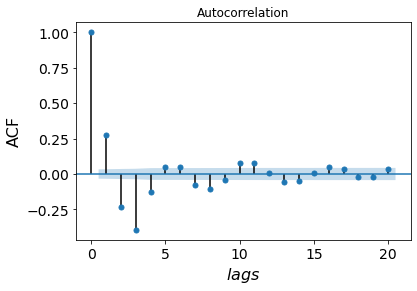

In [ ]:
plot_acf(r_train, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

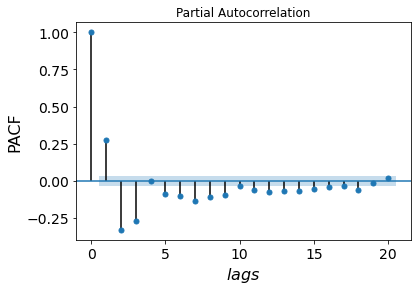

In [ ]:
plot_pacf(r_train, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#method : 
models = [(p,q) for p in range(4) for q in range (4)]

M = {}
for p,q in models:
    #fit an arma
    print(p,q)
    ft = ARIMA(r_train,order=(p,0,q)).fit()
    M[p,q] = ft

AIC = pd.DataFrame( [((p,q),ft.aic) for (p,q),ft in M.items()],columns=['model','AIC'] ) 

AIC



0 0
0 1
0 2
0 3


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


1 0
1 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


1 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


1 3


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2 0
2 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2 3


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


3 0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


3 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


3 2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


3 3


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,model,AIC
0,"(0, 0)",-13810.998550
1,"(0, 1)",-14213.485437
2,"(0, 2)",-14211.700601
3,"(0, 3)",-14869.664038
4,"(1, 0)",-14081.581248
5,"(1, 1)",-14211.512296
6,"(1, 2)",-14738.665198
7,"(1, 3)",-15001.192883
8,"(2, 0)",-14483.303311
9,"(2, 1)",-14901.372959


In [ ]:
#We are not interested in the absolute value but in the difference with the minimum values of the colonne AIC

AIC = AIC.assign(dAIC=(AIC.AIC - AIC.AIC.min())) 
AIC = AIC.sort_values('AIC').reset_index(drop=True)
AIC

#we chose models with the least dAIC


,model,AIC,dAIC
0,"(3, 3)",-15020.513352,0.000000
1,"(2, 3)",-15016.581775,3.931577
2,"(1, 3)",-15001.192883,19.320469
3,"(3, 1)",-14929.862928,90.650424
4,"(2, 2)",-14917.334205,103.179147
5,"(3, 2)",-14908.166005,112.347347
6,"(2, 1)",-14901.372959,119.140392
7,"(0, 3)",-14869.664038,150.849314
8,"(3, 0)",-14743.677044,276.836307
9,"(1, 2)",-14738.665198,281.848154


In [ ]:
#If you need information about the function, you can display the docstring
hf.evaluate_arima_model?

## Search for the best ARIMA model
We use grid search to search for the best ARIMA parameters that gives the lowest error. This follows the Box-Jenkins methology.

In [ ]:

best_cfg, best_score = hf.arima_grid_search(r_train["market-price"], 
                                            r_test["market-price"],
                                            np.arange(1,4), [0] , np.arange(1,4))

ARIMA(1,0,1) RMSE=0.040


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1,0,2) RMSE=0.037
ARIMA(1,0,3) RMSE=0.037


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2,0,1) RMSE=0.037
ARIMA(2,0,2) RMSE=0.038
ARIMA(2,0,3) RMSE=0.037
ARIMA(3,0,1) RMSE=0.038
ARIMA(3,0,2) RMSE=0.037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARIMA(3,0,3) RMSE=0.037
Best ARIMA(1, 0, 3) MSE=0.037


In [ ]:
# we run a Ljung-Box test on the residuals to determine if we have achieved a good fit.
parameters = (1,0,3)
errors, predictions = hf.evaluate_arima_model(r_train["market-price"], 
                                              r_test["market-price"], parameters )
# we want to minimize this error
errors

0.03667123304292861

## Visualization
To have a better view on the difference between true and predict values, we visualize them by plotting both the signals.

In [ ]:
# prepare the dataset for plotting
predict_date = df_blockchain.index[-30::] #30 dernières lignes?
# to see the difference use X_test
df_predict = pd.DataFrame(zip(predict_date,
                              predictions, r_test["market-price"].values),
                          columns=["date", "predict", "true"])

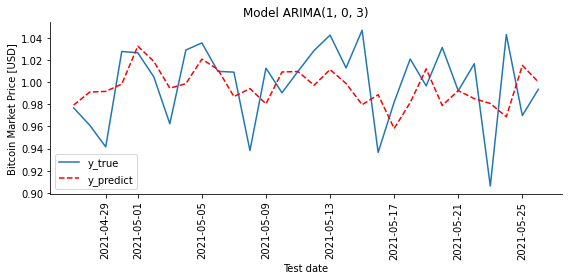

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="date", y="true", data=df_predict, 
             ax=ax, label="y_true", markers=True )
plot_ = sns.lineplot(x="date",
             y="predict",
             data=df_predict,
             color="red",ax=ax, label="y_predict")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()
freq = 4

labels = axis
#ax.set_xticklabels(labels)
plt.xticks(rotation='vertical')
ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title(f"Model ARIMA{parameters}")
sns.despine()
plt.legend()
plt.tight_layout()


In [ ]:
parameters1 = (3,0,3)
errors1, predictions1 = hf.evaluate_arima_model(r_train["market-price"], 
                                              r_test["market-price"], parameters )

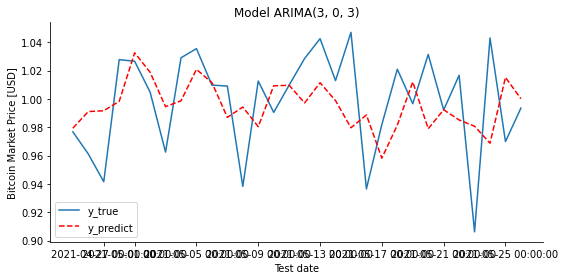

In [ ]:
df_predict1 = pd.DataFrame(zip(predict_date,
                              predictions1, r_test["market-price"].values),
                          columns=["date", "predict", "true"])

fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="date", y="true", data=df_predict1, 
             ax=ax, label="y_true", markers=True )
plot_ = sns.lineplot(x="date",
             y="predict",
             data=df_predict1,
             color="red",ax=ax, label="y_predict")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()
freq = 4

labels = predict_date[::freq]
ax.set_xticklabels(labels)

ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title(f"Model ARIMA{parameters1}")
sns.despine()
plt.legend()
plt.tight_layout()


# third method : use SARIMAX

first we'll try finding the most convenient exogenous variables

In [ ]:
colonnes=df_blockchain.columns.to_list()

data=df_blockchain.dropna(0) 
pearson=[]
for i in range(1,len(colonnes)):
     pearson.append((scipy.stats.pearsonr(data["market-price"], data[colonnes[i]])[0],colonnes[i]))
df=pd.DataFrame(pearson,columns=["correlation coeff",'variable'])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,correlation coeff,variable
0,1.000000,market-price
1,0.012161,n-transactions-per-block
2,-0.301234,median-confirmation-time
3,0.220034,hash-rate
4,-0.636217,difficulty
5,0.815900,miners-revenue
6,-0.482827,trade-volume
7,-0.776624,blocks-size
8,0.068983,avg-block-size
9,0.242490,transaction-fees


for the exogenous variable, we will consider and try variables that are most correlated with the market-price :

market-cap

miners-revenue

In [ ]:
#We won't be using SARIMAX but rather ARIMAX since the time series has no season
param=[(p,q,d) for p in range(2) for q in range(2) for d in range(2) ]
models={}
for p,q,d in param :
    print(p,q,d)
    models[p,q,d]=((p,q,d),SARIMAX(X_train["market-price"], order=(p, q, d), seasonal_order=(0, 0,0,0),exog=X_train['market-cap']).fit(disp=-1).aic)

0 0 0


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1 0 1


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
models

{(0, 0, 0): ((0, 0, 0), 77112.59652258939),
 (0, 0, 1): ((0, 0, 1), 51214.911016757054),
 (0, 1, 0): ((0, 1, 0), 75839.65796777804),
 (0, 1, 1): ((0, 1, 1), 49647.38936328094),
 (1, 0, 0): ((1, 0, 0), 50248.94385139884),
 (1, 0, 1): ((1, 0, 1), 115365.60666716538),
 (1, 1, 0): ((1, 1, 0), 49824.8233486784),
 (1, 1, 1): ((1, 1, 1), 49622.939310786714)}

In [ ]:


AIC = pd.DataFrame(models)#,columns=['model','AIC'] ) 
AIC



0                                                       1  \
              0                           1                           0   
              0             1             0             1             0   
0     (0, 0, 0)     (0, 0, 1)     (0, 1, 0)     (0, 1, 1)     (1, 0, 0)   
1  77112.596523  51214.911017  75839.657968  49647.389363  50248.943851   

                                              
                             1                
               1             0             1  
0      (1, 0, 1)     (1, 1, 0)     (1, 1, 1)  
1  115365.606667  49824.823349  49622.939311

we'll try plotting 

ARIMAX(0,1,1)

ARIMAX(1,1,0) 

ARIMAX(1,1,1)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


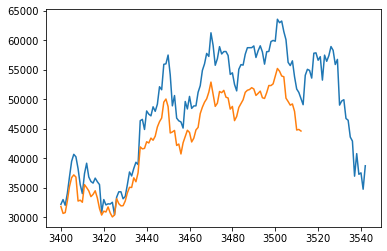

In [ ]:
import scipy
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(X_train["market-price"], order=(1, 1, 0), seasonal_order=(0, 0,0,0),exog=X_train['market-cap']).fit(disp=-1)

df_blockchain['forecast']=model.predict(start=3400,end=3512,dynamic=True)
plt.plot(df_blockchain['market-price'][3400:3543])
plt.plot(df_blockchain['forecast'])

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


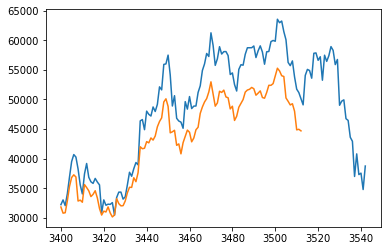

In [ ]:
import scipy
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(X_train["market-price"], order=(0, 1, 1), seasonal_order=(0, 0,0,0),exog=X_train['market-cap']).fit(disp=-1)

df_blockchain['forecast1']=model1.predict(start=3400,end=3512,dynamic=True)
plt.plot(df_blockchain['market-price'][3400:3543])
plt.plot(df_blockchain['forecast1'])

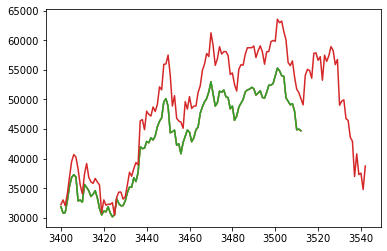

In [ ]:
model2=SARIMAX(X_train["market-price"], order=(1, 1, 1), seasonal_order=(0, 0,0,0),exog=X_train['market-cap']).fit(disp=-1)
df_blockchain['forecast2']=model2.predict(start=3400,end=3512,dynamic=True)

plt.plot(df_blockchain['forecast'])
plt.plot(df_blockchain['forecast1'])
plt.plot(df_blockchain['forecast2'])
plt.plot(df_blockchain['market-price'][3400:3543])

they all look the same

we'll try using another column

the problem with taking the market-cap colum is that it is a future information at the time of prediction, therefore we cannot use it to predict the last prices

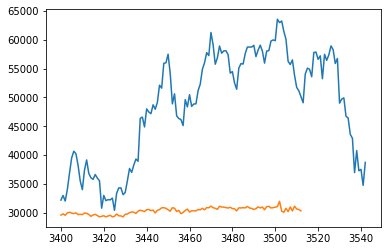

In [ ]:
model=SARIMAX(X_train["market-price"], order=(1, 1, 0), seasonal_order=(0, 0,0,0),exog=X_train['miners-revenue']).fit(disp=-1)

df_blockchain['forecast1']=model.predict(start=3400,end=3512,dynamic=True)
plt.plot(df_blockchain['market-price'][3400:3543])
plt.plot(df_blockchain['forecast1'])

not as effecient ...